# Data Clearning

The main objective of the notebook is to:
* Get familiar with the dataset
* Discover the data quality issues
* Fix the data quality issues
* Replace `don't know` and refused response with `na`

In [1]:
import os, sys
# # Path needs to be added manually to read from another folder
# path2add = os.path.normpath(os.path.abspath(os.path.join(os.path.dirname('__file__'), os.path.pardir, 'utils')))
# if (not (path2add in sys.path)) :
#     sys.path.append(path2add)
if os.path.abspath("../..") not in sys.path:
    sys.path.insert(0, os.path.abspath("../.."))

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import chain # combine list of columns


from utils.cleaning import show_columns_with_only_na


pd.set_option('display.max_columns', 400)

sns.set_theme(style="ticks", palette="pastel")



## Load in Data

In [3]:
data = pd.read_csv("../../data/DIEM_NG/diem_hh_surveys_nigeria.csv", low_memory=False)


In [4]:
data.shape

(172531, 359)

In [5]:
print("Shape of original dataset:")
print(data.shape)
print("\nOriginal number of variables: ")
print(len(data.columns))
print(f"\nUnique countries: {len(data["adm0_name"].unique())}")
print(data["adm0_name"].unique())
print(f"\nSurvey Rounds: {len(data["round"].unique())} ")


# Display the first row
data.head(1)

Shape of original dataset:
(172531, 359)

Original number of variables: 
359

Unique countries: 22
['Nigeria' 'Sierra Leone' 'Pakistan' 'Iraq' 'Central African Republic'
 'Guatemala' 'Cameroon' 'Mozambique' 'Bangladesh' 'Yemen' 'Zimbabwe'
 'Mali' 'Myanmar' 'Niger' 'Colombia' 'Haiti' 'Burkina Faso' 'Somalia'
 'Chad' 'Afghanistan' 'Democratic Republic of the Congo' 'Lebanon']

Survey Rounds: 13 


,OBJECTID,survey_id,adm0_name,adm0_iso3,adm0_m49,adm1_pcode,adm1_name,adm2_pcode,adm2_name,adm3_pcode,adm3_name,survey_date,round,total_case_duration,resp_age,resp_age_rng,resp_gender,hh_agricactivity,hh_gender,hh_education,hh_wealth_water,hh_wealth_toilet,hh_wealth_light,hh_residencetype,hh_size,hh_size_rng,hh_maritalstat,hh_age,resp_islsproducer,resp_iscropproducer,resp_isfishproducer,income_main,income_main_amount,income_main_gender,income_main_control,income_main_comp,income_sec,income_sec_amount,income_sec_gender,income_sec_control,income_sec_comp,income_third,income_third_amount,income_third_gender,income_third_control,income_third_comp,tot_income,shock_noshock,shock_sicknessordeathofhh,shock_lostemplorwork,shock_otherintrahhshock,shock_higherfoodprices,shock_higherfuelprices,shock_mvtrestrict,shock_othereconomicshock,shock_pestoutbreak,shock_plantdisease,shock_animaldisease,shock_napasture,shock_othercropandlivests,shock_coldtemporhail,shock_flood,shock_hurricane,shock_drought,shock_earthquake,shock_landslides,shock_firenatural,shock_othernathazard,shock_violenceinsecconf,shock_theftofprodassets,shock_firemanmade,shock_othermanmadehazard,shock_dk,shock_ref,covid_goodstransp,covid_marketclosed,covid_borderclosed,covid_stayhome,covid_gatherings,covid_processclosed,covid_curfew,covid_school,covid_other,covid_none,covid_dk,covid_ref,crp_landsize_ha,crp_main,crp_main_check,crp_irrig_source,crp_irrig_system,crp_irrig_pay,crp_seed_ownprod,crp_seed_market,crp_seed_company,crp_seed_ngo,crp_seed_organized_community,crp_seed_gov,crp_seed_relatives_friends,crp_seed_other,crp_seed_dk,crp_seed_ref,crp_area_change,crp_harv_change,crp_harv_vol_kg,crp_harv_lastyr_kg,crp_proddif,crp_proddif_plant_disease,crp_proddif_pest_outbreak,crp_proddif_animal_grazing,crp_proddif_access_plot,crp_proddif_access_fertilize,crp_proddif_seed_quality,crp_proddif_seed_quantity,crp_proddif_access_pesticide,crp_proddif_access_labour,crp_proddif_access_machinery,crp_proddif_access_fuel,crp_proddif_soil_erosion,crp_proddif_lack_irrigation,crp_proddif_excess_water,crp_proddif_access_credit,crp_proddif_other,crp_proddif_dk,crp_proddif_ref,crp_storage,crp_salesmain,crp_salesdif,crp_saledif_marketing_cost,crp_saledif_damage_losses,crp_saledif_low_demand,crp_saledif_pay_delay,crp_saledif_low_price,crp_saledif_processing,crp_saledif_competition,crp_saledif_other,crp_saledif_dk,crp_saledif_ref,crp_salesprice,ls_main,ls_num_lastyr,ls_num_now,ls_num_diff,ls_num_increased,ls_num_decreased,ls_num_no_change,ls_num_inc_less_sales,ls_num_inc_more_birth,ls_num_inc_more_acquired,ls_num_inc_received_free,ls_num_dec_poor_health,ls_num_dec_death,ls_num_dec_sales_good_price,ls_num_dec_sales_distress,ls_num_dec_escape_stolen,ls_num_dec_consumed,ls_num_inc_dec_other,ls_num_inc_dec_dk,ls_num_inc_dec_ref,ls_feed_open_pasture,ls_feed_common_pasture,ls_feed_self_produced,ls_feed_purchased,ls_feed_free_dist,ls_feed_other,ls_feed_dk,ls_feed_ref,ls_proddif,ls_proddif_feed_purchase,ls_proddif_access_pasture,ls_proddif_access_water,ls_proddif_vet_serv,ls_proddif_vet_input,ls_proddif_diseases,ls_proddif_theft,ls_proddif_access_market,ls_proddif_access_credit,ls_proddif_access_labour,ls_proddif_other,ls_proddif_dk,ls_proddif_ref,ls_salesmain,ls_salesdif,ls_salesdif_marketing_cost,ls_salesdif_damage_losses,ls_salesdif_low_demand,ls_salesdif_pay_delay,ls_salesdif_low_price,ls_salesdif_slaughterhouse,ls_salesdif_processing,ls_salesdif_competition,ls_salesdif_other,ls_salesdif_dk,ls_salesdif_ref,ls_salesprice,fish_main_coastal,fish_main_offshore_sea,fish_main_freshwater,fish_main_aquaculture,fish_main_dk,fish_main_ref,fish_change,fish_proddif,fish_proddif_find_fish,fish_proddif_pests,fish_proddif_access_area,fish_proddif_fuel,fish_proddif_input_access,fish_proddif_labour,fish_proddif_infrastructure,fish_proddif_damage_equip,fish_proddif_other,fish_proddif_dk,fish_proddif_ref,fish_inputdif_bait_feed,fish_inputdif_fingerling,fish_inputdif_gear,fish_inputdif_ice,fish_inputdif_fuel,fish_inputdif_repa

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172531 entries, 0 to 172530
Columns: 359 entries, OBJECTID to GlobalID
dtypes: float64(334), int64(9), object(16)
memory usage: 472.6+ MB


**Observations**
* The dataset contains ~173k records and 359 variables.
* The records include 22 countries. 
* The dataset was collected in 13 different `rounds` i.e. different time periods.

**Impact**: 
For this project, we are interested in `adm0_name`(country) Nigeria and `round` 6.|

### Subset Data: 
Select records where `adm0_name` is Nigeria and `round` == 4

In [7]:
# Select records for Nigeria only
df_nig =  data.query("(adm0_name == 'Nigeria') & (round == 4)").reset_index(drop=True)

print("Subset shape:", df_nig.shape)
print("Unique states: ", df_nig["adm1_name"].unique())
print("Round: ", df_nig["round"].unique())

df_nig.tail(1)

Subset shape: (1418, 359)
Unique states:  ['Yobe' 'Zamfara' 'Adamawa' 'Borno' 'Katsina']
Round:  [4]


,OBJECTID,survey_id,adm0_name,adm0_iso3,adm0_m49,adm1_pcode,adm1_name,adm2_pcode,adm2_name,adm3_pcode,adm3_name,survey_date,round,total_case_duration,resp_age,resp_age_rng,resp_gender,hh_agricactivity,hh_gender,hh_education,hh_wealth_water,hh_wealth_toilet,hh_wealth_light,hh_residencetype,hh_size,hh_size_rng,hh_maritalstat,hh_age,resp_islsproducer,resp_iscropproducer,resp_isfishproducer,income_main,income_main_amount,income_main_gender,income_main_control,income_main_comp,income_sec,income_sec_amount,income_sec_gender,income_sec_control,income_sec_comp,income_third,income_third_amount,income_third_gender,income_third_control,income_third_comp,tot_income,shock_noshock,shock_sicknessordeathofhh,shock_lostemplorwork,shock_otherintrahhshock,shock_higherfoodprices,shock_higherfuelprices,shock_mvtrestrict,shock_othereconomicshock,shock_pestoutbreak,shock_plantdisease,shock_animaldisease,shock_napasture,shock_othercropandlivests,shock_coldtemporhail,shock_flood,shock_hurricane,shock_drought,shock_earthquake,shock_landslides,shock_firenatural,shock_othernathazard,shock_violenceinsecconf,shock_theftofprodassets,shock_firemanmade,shock_othermanmadehazard,shock_dk,shock_ref,covid_goodstransp,covid_marketclosed,covid_borderclosed,covid_stayhome,covid_gatherings,covid_processclosed,covid_curfew,covid_school,covid_other,covid_none,covid_dk,covid_ref,crp_landsize_ha,crp_main,crp_main_check,crp_irrig_source,crp_irrig_system,crp_irrig_pay,crp_seed_ownprod,crp_seed_market,crp_seed_company,crp_seed_ngo,crp_seed_organized_community,crp_seed_gov,crp_seed_relatives_friends,crp_seed_other,crp_seed_dk,crp_seed_ref,crp_area_change,crp_harv_change,crp_harv_vol_kg,crp_harv_lastyr_kg,crp_proddif,crp_proddif_plant_disease,crp_proddif_pest_outbreak,crp_proddif_animal_grazing,crp_proddif_access_plot,crp_proddif_access_fertilize,crp_proddif_seed_quality,crp_proddif_seed_quantity,crp_proddif_access_pesticide,crp_proddif_access_labour,crp_proddif_access_machinery,crp_proddif_access_fuel,crp_proddif_soil_erosion,crp_proddif_lack_irrigation,crp_proddif_excess_water,crp_proddif_access_credit,crp_proddif_other,crp_proddif_dk,crp_proddif_ref,crp_storage,crp_salesmain,crp_salesdif,crp_saledif_marketing_cost,crp_saledif_damage_losses,crp_saledif_low_demand,crp_saledif_pay_delay,crp_saledif_low_price,crp_saledif_processing,crp_saledif_competition,crp_saledif_other,crp_saledif_dk,crp_saledif_ref,crp_salesprice,ls_main,ls_num_lastyr,ls_num_now,ls_num_diff,ls_num_increased,ls_num_decreased,ls_num_no_change,ls_num_inc_less_sales,ls_num_inc_more_birth,ls_num_inc_more_acquired,ls_num_inc_received_free,ls_num_dec_poor_health,ls_num_dec_death,ls_num_dec_sales_good_price,ls_num_dec_sales_distress,ls_num_dec_escape_stolen,ls_num_dec_consumed,ls_num_inc_dec_other,ls_num_inc_dec_dk,ls_num_inc_dec_ref,ls_feed_open_pasture,ls_feed_common_pasture,ls_feed_self_produced,ls_feed_purchased,ls_feed_free_dist,ls_feed_other,ls_feed_dk,ls_feed_ref,ls_proddif,ls_proddif_feed_purchase,ls_proddif_access_pasture,ls_proddif_access_water,ls_proddif_vet_serv,ls_proddif_vet_input,ls_proddif_diseases,ls_proddif_theft,ls_proddif_access_market,ls_proddif_access_credit,ls_proddif_access_labour,ls_proddif_other,ls_proddif_dk,ls_proddif_ref,ls_salesmain,ls_salesdif,ls_salesdif_marketing_cost,ls_salesdif_damage_losses,ls_salesdif_low_demand,ls_salesdif_pay_delay,ls_salesdif_low_price,ls_salesdif_slaughterhouse,ls_salesdif_processing,ls_salesdif_competition,ls_salesdif_other,ls_salesdif_dk,ls_salesdif_ref,ls_salesprice,fish_main_coastal,fish_main_offshore_sea,fish_main_freshwater,fish_main_aquaculture,fish_main_dk,fish_main_ref,fish_change,fish_proddif,fish_proddif_find_fish,fish_proddif_pests,fish_proddif_access_area,fish_proddif_fuel,fish_proddif_input_access,fish_proddif_labour,fish_proddif_infrastructure,fish_proddif_damage_equip,fish_proddif_other,fish_proddif_dk,fish_proddif_ref,fish_inputdif_bait_feed,fish_inputdif_fingerling,fish_inputdif_gear,fish_inputdif_ice,fish_inputdif_fuel,fish_inputdif_repa

**Observations**
* For round 4, and Nigeria, there are 3441 records.
* The records are distributed over 5 states. All the states are from the northern part of Nigeria
*

### Select Variables(Columns) of interest

In [8]:
# location columns
location_cols = ["adm0_name", "adm1_name", "adm2_name"]

# Demographic
demographic_cols = ["hh_agricactivity", "hh_gender",
                    "hh_education", "hh_size",
                    "hh_maritalstat","hh_age",
                    "resp_islsproducer", "resp_iscropproducer", "resp_isfishproducer",
                    "weight_final"]

# Income source 
income_cols = ["hh_wealth_water","hh_wealth_toilet","hh_wealth_light","hh_residencetype",
               "income_main","income_main_gender", 
               "income_main_amount","income_sec_amount", "income_third_amount",
               "income_main_comp", "fcg",
               "income_main_control", "income_sec","income_third", "tot_income"]

# Get all colums related to shocks.
shocks_col = [col for col in df_nig.columns if col.startswith("shock")]
# Investigate the more prevalent shock.

# Get all crop 
crp_cols = [col for col in df_nig.columns if col.startswith("crp")]

# Livestock
livestock_cols = [col for col in df_nig.columns if col.startswith("ls")]

# Fish
fish_cols = ["fish_proddif", "fish_salesdif"]


#---- Live and crop production difficulty
crp_proddiff_cols = [col for col in df_nig.columns if col.startswith("crp_proddif")]

# Livestock difficulties cols
ls_proddif_cols = [col for col in df_nig.columns if col.startswith("ls_proddif")]

# Fish Production Diff

# What is the most prevalent production difficulty experienced?
# Highlight `crp_proddiff_access_fertilzer`
#-----

# fies 
fies_cols = [col for col in df_nig.columns if col.startswith("fies_")]
fies_prob_cols = ["p_mod", "p_sev"]

# Coping strategies 
copping_cols = [col for col in df_nig.columns if col.startswith("cs_")]

rcsi_cols = [col for col in df_nig.columns if col.startswith("rcsi_")]

hdds_cols = [col for col in df_nig.columns if col.startswith("hdds_")]


# fcs_col
fcs_cols = [col for col in df_nig.columns if col.startswith("fcs_")] 

# Need
need_cols = [col for col in df_nig.columns if col.startswith("need")]




col_of_interest = list(chain(location_cols, demographic_cols, 
                             income_cols, shocks_col, crp_cols,
                             livestock_cols, fish_cols, need_cols, 
                             fies_cols, fies_prob_cols, copping_cols, 
                             rcsi_cols, hdds_cols, fcs_cols)
                      )


In [9]:
# fies = df_nig[fies_cols].drop(columns=["fies_ranout_hhs", "fies_hungry_hhs", "fies_whlday_hhs", "fies_rawscore"])
df = df_nig.loc[:, col_of_interest]
df.shape

(1418, 261)

**Observations**
* Upon subsetting the variables of interest, we are now have 258 columns and 1418 records.
* This is still a lot of columns, we shall subset even further.

## Data Profiling

In [10]:
# df.describe()

**Observation**
* Most of the columns have descrete numerical values. From the metadata, these are categorical variables
* There are columns with NaN only such as `income_main_amount`.
* The values 888, 888000, 999000 and 999 are representation of 'Don't know' and 'Refused. There are not outliers/anomalies
* We have a lot of columns, need to be subset even further

**Impact**
* These values shall be replaced with NaN

## Investigating Outliers and Handling Missing Data and Recoding Variables

#### Columns with 888, 999, 888000 and 999000

In [11]:
# Values to check for presence
values_to_check = [888, 999, 888000, 999000]

# Check in how many columns the values are present
columns_with_values = df.isin(values_to_check).any()
num_columns_with_values = columns_with_values.sum()

print(f"{values_to_check} Values are present in {num_columns_with_values} columns of the DataFrame.")
print(f"Columns where values {values_to_check} are present: \n{ list(columns_with_values[columns_with_values].index)}")


# df = df.replace({888: np.nan, 999: np.nan, 888000: np.nan, 999000: np.nan})

[888, 999, 888000, 999000] Values are present in 4 columns of the DataFrame.
Columns where values [888, 999, 888000, 999000] are present: 
['income_sec', 'income_third', 'cs_illegal', 'cs_sold_last_female']


#### Columns with Only NaN

In [12]:
# Display the columns with only NaN values
print("Columns with all Nan values to be dropped: ", len(show_columns_with_only_na(df)))
show_columns_with_only_na(df)


Columns with all Nan values to be dropped:  19


Index(['hh_maritalstat', 'hh_wealth_water', 'hh_wealth_light',
       'hh_residencetype', 'income_main_gender', 'income_third_amount',
       'income_main_control', 'crp_irrig_system', 'crp_irrig_pay',
       'crp_harv_vol_kg', 'fies_rawscore', 'cs_sold_more_animals',
       'cs_eat_elsewhere', 'cs_borrowed_or_helped', 'cs_credit',
       'cs_changed_school', 'cs_consume_seed_stock', 'cs_decrease_input_exp',
       'cs_hh_migration'],
      dtype='object')

**Observations**
* There are 35 columns that have only NaN values.
* 34 columns contains responses coded as 888, 888, 888000, 999000. They represents 'Don't know' and 'Refused'

**Impact**
* These columns with only `NaN` values shall be dropped from the dataset
* The 34 columns with `[888, 999, 888000, 999000]` to be filled with `NaN`.

#### Investigate the presence of NaN using specific sub columns

**Income**

In [13]:
df.loc[:, income_cols].isna().sum()

hh_wealth_water        1418
hh_wealth_toilet         99
hh_wealth_light        1418
hh_residencetype       1418
income_main               0
income_main_gender     1418
income_main_amount        1
income_sec_amount       947
income_third_amount    1418
income_main_comp          0
fcg                       0
income_main_control    1418
income_sec                0
income_third            946
tot_income               12
dtype: int64

In [14]:
df.loc[:, income_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1418 entries, 0 to 1417
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hh_wealth_water      0 non-null      float64
 1   hh_wealth_toilet     1319 non-null   float64
 2   hh_wealth_light      0 non-null      float64
 3   hh_residencetype     0 non-null      float64
 4   income_main          1418 non-null   float64
 5   income_main_gender   0 non-null      float64
 6   income_main_amount   1417 non-null   float64
 7   income_sec_amount    471 non-null    float64
 8   income_third_amount  0 non-null      float64
 9   income_main_comp     1418 non-null   float64
 10  fcg                  1418 non-null   float64
 11  income_main_control  0 non-null      float64
 12  income_sec           1418 non-null   float64
 13  income_third         472 non-null    float64
 14  tot_income           1406 non-null   float64
dtypes: float64(15)
memory usage: 166.3 KB


**Obsersation**
* The income dtype is a `float`, however upon checking with the metadata, its is a discrete variable that should be categorical.
* The values for `income_main_amount` and `tot_income` are not provided in the dataset.
* For NaN values in `income_sec` and `income_third` we shall `fillna()` with '`19`'. This represents _No income source in the last 3 months and used exclusively savings, debt_ according to the metadata for this dataset.
* Nan values in `income_main_comp` shalled be filled with the `mode` value from the column



#### **FIES**

In [15]:
df.loc[:, fies_cols].fies_whlday.value_counts()

fies_whlday
0.0    1365
1.0      51
Name: count, dtype: int64

**Handle `FIES` columns**

In [16]:
# Replace NaN in the fies with the mode value from each column
# Drop certain columns not needed
# Calculate the target variables fies_rawscore
def fies_handler(df, like="fies"):
    
    fies_df = (df.filter(like=like)
               .drop(columns=["fies_ranout_hhs", "fies_hungry_hhs", 
                              "fies_whlday_hhs", "fies_rawscore"])
               .assign(fies_rawscore = lambda df_:df_.sum(axis=1))
              )
    # Replace the columns
    df_copy = df.copy()
    df_copy[fies_df.columns] = fies_df
    # Drop NaN
    df_copy.dropna(subset=fies_df.columns, inplace=True)
    return df_copy

### Recode and Rename Columns of Interest

**`income_main`**

We shall recode the discrete values to string equivalent using the meta data.
For intances `income_main` ranges from 1-19. 


Where: `{"19": "No income source in the last 3 months and used exclusively savings, debt"}`

In [17]:
# Production and sale of Ag produce (1-6)
# Collection and sale of bush and wood (7)
# Agricultural trader (8)
# Agricultural wage and employment (9-10)
# Non-Agricultural wage and employment (11-13)
# public employment (14)
# Income not from work (15-18)
# No Employment (19)
conditions1 = [df["income_main"].isin(list(range(1,7))),
              df["income_main"] == 7,
              df["income_main"] == 8,
              df["income_main"].isin([9, 10]),
              df["income_main"].isin([11,12,13]),
              df["income_main"]==14,
              df["income_main"].isin(list(range(15, 18))),
              df["income_main"] == 19
             ]
choices1 = ["Production and sale of Ag produce",
          "Collection and sale of bush and wood",
          "Agricultural trader",
          "Agricultural wage and employment",
          "Non-Agricultural wage and employment",
          "Public employment",
          "Income not from work",
          "No Employment"]

# income_main_cat = pd.Categorical(np.select(conditions, choices, default="No Employment"))


In [18]:
conditions = [df["income_main"].isin([1,2, 3,4,5,6,7, 8, 9, 10]),
              df["income_main"].isin([11,12,13,14]),
              df["income_main"].isin([15,16,17,18]),
              df["income_main"] == 19
             ]
choices = ["Agricultural employment",
          "Non Agricultural employment",
          "Income from charity and remittance",
          "No Employment"]

#### Outlier Analysis
The `crp_landsize_ha`, `hh_size` are the only column that is numerical.

We shall use the [`Tukey`](https://scholar.google.com/scholar_lookup?&journal=Exploratory+Data+Analysis&author=Tukey+J.+W.&publication_year=1977&volume=Vol.%202) method to identify the outlier

In [19]:
df[["crp_landsize_ha", "hh_size"]].describe()

,crp_landsize_ha,hh_size
count,911.000000,1309.000000
mean,394.778710,7.203972
std,9974.106571,2.424477
min,0.000019,1.000000
25%,1.000000,5.000000
50%,2.000000,7.000000
75%,5.000000,9.000000
max,300000.000000,13.000000


In [20]:
def outlier_info(df:pd.DataFrame, column_name:str, figsize=(10,1))->None:
    """Visualizes the distribution of a column in the DataFrame and identifies outliers.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to analyze.
        figsize (tuple): The size of the figure (width, height). Default is (10, 1).

    Returns:
        None
        """
    plt.figure(figsize=figsize)
   # Calculate the first and third quartiles
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f"Number of outlier in {column_name}: ")
    print(f"{outliers[column_name].count()}")
    
    sns.boxplot(df[column_name], orient="h")
    # sns.histplot(df[column_name])


Number of outlier in crp_landsize_ha: 
32


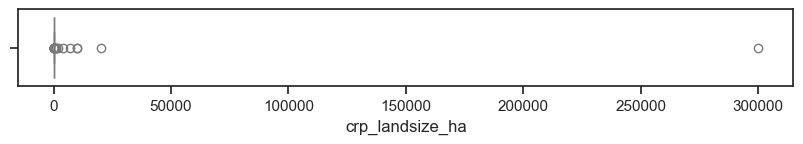

In [21]:
# Handle outlier from landsize_area
outlier_info(df, "crp_landsize_ha")

Number of outlier in hh_size: 
0


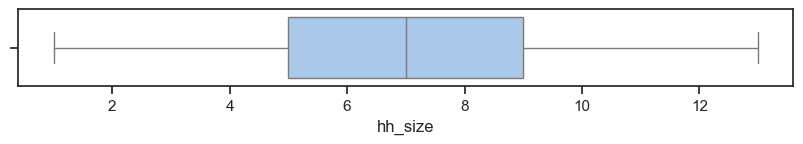

In [22]:
# Handle outlier in hh_size
outlier_info(df, "hh_size")

**Observation**
* There are 74 and 171 outliers datapoints in `hh_size` and `crp_landsize_ha` columns respectively.
* The data points are not just anomalies but problematic. I suspect, miscommunication of metrics and overstating who makes up a family

**Impacts**
* Because the numbers of outliers are much, they shall be handled differently.

From the boxplot, we can see that there exist some outlier in our our dataset. 
**Next** we shall handle the outlier by replacing them with non-outlier values. In our case we shall use the mean of the non-outlier values

In [23]:
def replace_outliers_with_mean(df:pd.DataFrame, column_name:str)->pd.DataFrame:
    """
    Replace outlier values in a DataFrame column with the mean of non-outlier values.

    Parameters:
        df (DataFrame): The DataFrame containing the column with outlier values.
        column_name (str): The name of the column containing the outlier values.

    Returns:
        DataFrame: A copy of the original DataFrame with outlier values replaced by the mean.
    """
    # Calculate the first and third quartiles
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the IQR
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    # Replace outlier values with the mean of non-outlier values
    non_outliers_mean = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)][column_name].mean()

    # Explicitly cast non_outliers_mean to the same dtype as the DataFrame column
    non_outliers_mean = df[column_name].dtype.type(non_outliers_mean)

    df_copy = df.copy()
    df_copy.loc[outliers.index, column_name] = non_outliers_mean

    return df_copy

## Data-Preprocessing Pipeline
Based on the analysis above, the following data cleaning and pre-processing steps will be taken:

* Subset Nigeria and round 6
* Replace all instances of 888, 888000, 999 and 999000 with NaN
* Drop columns with only NaN values
* Rename certain columns, recode values, set datatypes and deal with some NaN values
* Handle outliers
* Drop certain columns not required for this analysis
* Data will be split into different Dataframe and outputed as csv files with no numerical ID index

In [24]:
# Rename certain columns, recode values, set datatypes and fill na values

def rename_recode_fillna(df:pd.DataFrame)->pd.DataFrame:
    """
    Rename columns, recode categorical variables, and fill missing values in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data to be processed.
    
    Returns:
    pd.DataFrame: The processed DataFrame with renamed columns, recoded categorical variables, and filled missing values.
    """
    output = (df
    .rename(columns={"adm0_name": "country",
                    "adm1_name": "state",
                    "adm2_name": "local_govt_area"})
    .assign(hh_agricactivity = lambda x:x.hh_agricactivity.replace({1: "crop production", 2: "livetock production",3: "crop and livestock production", 4: "No"}),
            hh_gender = lambda x:x.hh_gender.fillna(x.hh_gender.mode()[0]).replace({1: "Male", 2: "Female"}),
            hh_education = lambda x:x.hh_education.fillna(x["hh_education"].mode()[0]).replace({1: "No Education", 2: "Primary Education", 3: "Secondary Education", 4: "Higher Education", 5: "Religious Education"}),
            hh_size = lambda x:x.hh_size.fillna(x.hh_size.median()), # fill na with media
            hh_age = lambda x:x.hh_age.fillna(x.hh_age.mode()[0]).replace({1 : "Under 18", 2: "18 to 40", 3: "41 to 65", 4: "Over 65"}),
            income_main_cat = pd.Categorical(np.select(conditions, choices, default="No Employment")),
            income_main_comp = lambda x:x.income_main_comp.fillna(x["income_main_comp"].mode()[0]),
            income_sec = lambda x:x.income_sec.fillna(19.0),
            income_third = lambda x:x.income_third.fillna(19.0),
            resp_islsproducer = lambda x:x.resp_islsproducer.replace({0: "No", 1: "Yes"}),
            resp_iscropproducer = lambda x:x.resp_iscropproducer.replace({0: "No", 1: "Yes"}),
            resp_isfishproducer = lambda x:x.resp_isfishproducer.replace({0: "No", 1: "Yes"}),
            
            crp_landsize_ha = lambda x:x.crp_landsize_ha.fillna(0.0), # Nan corresponds with hh not into crop production
            crp_main = lambda x:x.crp_main.fillna(x.crp_main.mode()[0]),
            crp_area_change = lambda x:x.crp_area_change.replace({1: "A lot more", 2: "More", 3: "Same", 4: "Less", 5: "A lot less"}),
            crp_harv_change = lambda x:x.crp_harv_change.replace({1: "A lot more", 2: "More", 3: "Same", 4: "Less", 5: "A lot less"}),
            crp_proddif = lambda x:x.crp_proddif.replace({0: "No", 1: "Yes"}),
            crp_salesdif = lambda x:x.crp_salesdif.replace({0: "No", 1: "Yes"}),
            crp_salesprice = lambda x:x.crp_salesprice.replace({1: "A lot more", 2: "More", 3: "Same", 4: "Less", 5: "A lot less"}),
            
            ls_main = lambda x:x.ls_main.replace({1: "Cattle", 2: "Goat", 3: "Sheep", 4: "Swine", 5: "Equine", 6: "Small Animals", 7: "Poulty", 666: "Other"}),
            
            ls_proddif = lambda x:x.ls_proddif.replace({0: "No", 1: "Yes"}),
            ls_salesdif = lambda x:x.ls_salesdif.replace({0: "No", 1: "Yes"}),
            ls_num_decreased = lambda x:x.ls_num_decreased.replace({0: "No", 1: "Yes"}),
            ls_num_increased = lambda x:x.ls_num_increased.replace({0: "No", 1: "Yes"}),
            ls_salesprice = lambda x:x.ls_salesprice.replace({1: "A lot more", 2: "More", 3: "Same", 4: "Less", 5: "A lot less"}),
    
            fish_proddif = lambda x:x.fish_proddif.replace({0: "No", 1: "Yes"}),
            fish_salesdif = lambda x:x.fish_salesdif.replace({0: "No", 1: "Yes"}),

            need = lambda x:x.need.replace({0: "No", 1: "Yes"})
           )
             )
    return output

In [29]:
# This pipeline is work in progress

def cleaning_pipeline(data: pd.DataFrame, output_path: str):
    """Data cleaning and processing pipeline

    Args:
        data (pl.DataFrame): input dataset that needs to be pre-processed
        output_path (str): location of where to save the parquet file
    """
    
    df = (data
          .query("(adm0_name == 'Nigeria' ) & (round == 4)").reset_index(drop=True)
          .loc[:, col_of_interest]
         .replace({888: np.nan, 999: np.nan, 888000: np.nan, 999000: np.nan})
         .dropna(axis=1, how="all")
         .pipe(rename_recode_fillna)
         # .pipe(fies_handler)
         # .pipe(replace_outliers_with_mean, "crp_landsize_ha")
         # .pipe(replace_outliers_with_mean, "hh_size")
         .drop(columns=["crp_main_check", "crp_irrig_source", "fies_ranout_hhs", 
                        "fies_hungry_hhs", "fies_whlday_hhs"])
         )
    print(df.shape)
    df.to_csv(output, index=False)

In [30]:
output = "../../data/diem_round_4_ng.csv"

cleaning_pipeline(data, output)

(1418, 238)


In [26]:
# The scenario